In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [3]:
df['Unnamed: 0'].nunique()

1302

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [5]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

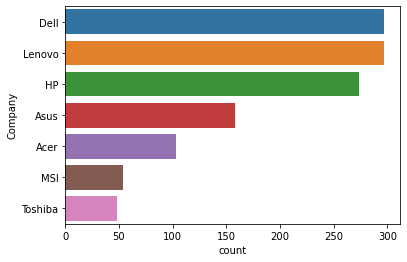

In [6]:
sns.countplot(y=df['Company'],order=df['Company'].value_counts().sort_values(ascending=False)[:7].index)
plt.show()

<AxesSubplot:xlabel='count', ylabel='TypeName'>

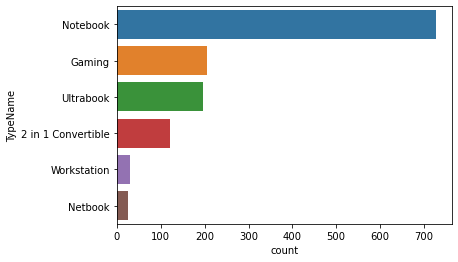

In [7]:
sns.countplot(y=df['TypeName'],
                order=df['TypeName'].value_counts().sort_values(ascending=False)[:6].index)

<function matplotlib.pyplot.show(close=None, block=None)>

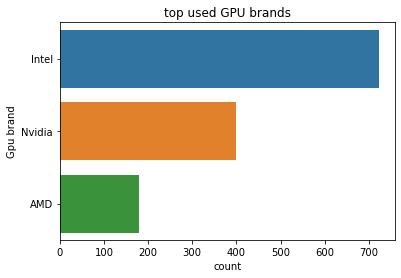

In [8]:
sns.countplot(y=df['Gpu brand'],
                order=df['Gpu brand'].value_counts().sort_values(ascending=False)[:].index)
plt.title('top used GPU brands')
plt.show

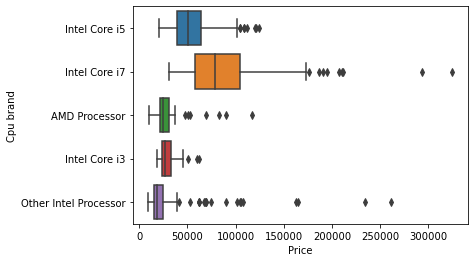

In [9]:
sns.boxplot(y=df['Cpu brand'],x=df['Price'])
plt.show()

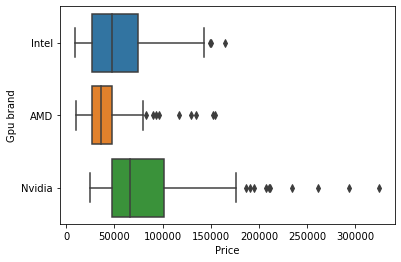

In [10]:
sns.boxplot(y=df['Gpu brand'],x=df['Price'])
plt.show()

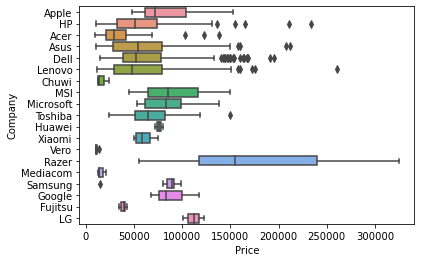

In [11]:
sns.boxplot(y=df['Company'],x=df['Price'])
plt.show()

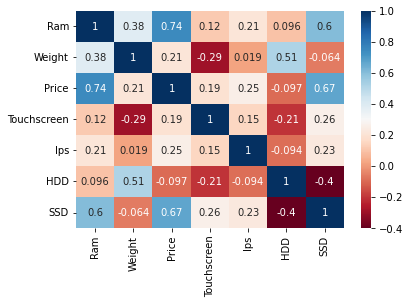

In [12]:
corr= df.corr()

sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

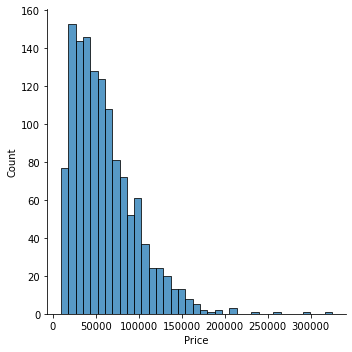

In [13]:
sns.displot(df['Price'])
plt.show()

In [14]:
df.describe(percentiles=[0.01,0.02,0.03,0.89,0.94,0.96,0.99,1.00])

,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000
1%,2.000000,0.970000,12201.120000,0.000000,0.00000,0.000000,0.000000
2%,4.000000,1.080200,13747.305600,0.000000,0.00000,0.000000,0.000000
3%,4.000000,1.100000,14811.323184,0.000000,0.00000,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,0.000000,256.000000
89%,16.000000,2.700000,105198.696000,1.000000,1.00000,1000.000000,512.000000
94%,16.000000,3.000000,125204.803200,1.000000,1.00000,1000.000000,512.000000


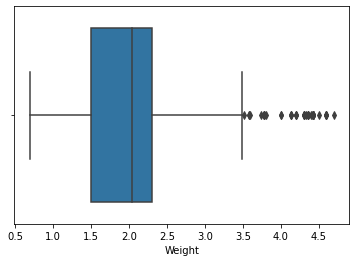

In [15]:
sns.boxplot(x=df['Weight'])
plt.show()

In [16]:
print(df[df['Weight']>3.5].shape)

(46, 12)


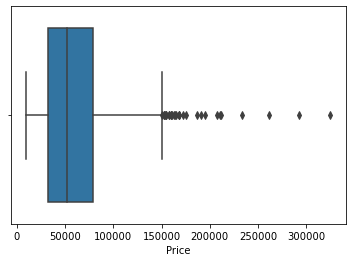

In [17]:
sns.boxplot(x=df['Price'])
plt.show()

In [18]:
print(df[df['Price']>200000].shape)

(7, 12)


In [19]:
df['Weight']= np.where(df['Weight']>3.5,3.5,df['Weight'])

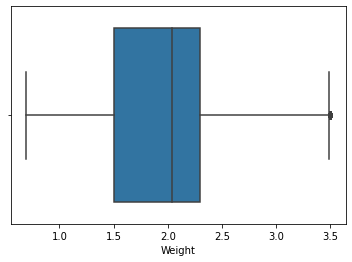

In [20]:
sns.boxplot(x=df['Weight'])
plt.show()

In [21]:
x=df.drop('Price', axis=1)
y=df['Price']
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(976, 11)
(326, 11)
(976,)
(326,)


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [27]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
x_train.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [32]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13779.804657516866
MSE 441055854.35544837
RMSE 21001.329823500426
R2 Score 0.7029069536618407


In [33]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Ridge(alpha=2.41)

pipe_rid = Pipeline([('step1',step1),('step2',step2)])

pipe_rid.fit(x_train,y_train)

ypred_rid = pipe_rid.predict(x_test)

eval_model(y_test,ypred_rid)

MAE 13539.81644722633
MSE 412006935.2872497
RMSE 20297.953968004993
R2 Score 0.7224741621538668


In [34]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Lasso(alpha=0.234)

pipe_las = Pipeline([('step1',step1),('step2',step2)])

pipe_las.fit(x_train,y_train)

ypred_las = pipe_las.predict(x_test)

eval_model(y_test,ypred_las)

MAE 13776.624801764421
MSE 440892087.7273123
RMSE 20997.430502976127
R2 Score 0.7030172660541625


In [35]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=11,random_state=5)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

MAE 11710.013859621055
MSE 348209594.2015227
RMSE 18660.374974836992
R2 Score 0.7654477361904976


In [36]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 12132.196322590713
MSE 340945360.1042264
RMSE 18464.70579522529
R2 Score 0.7703408884204643


In [37]:
import pickle

In [38]:
pickle.dump(pipe_dt,open('dt_model.pkl','wb'))   # Saving the best performing model
pickle.dump(df,open('data.pkl','wb'))              # Saving the dataset

In [39]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['Ram'].unique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
[ 8 16  4  2 12  6 32 24 64]


In [40]:
df['Ips'].value_counts()

0    938
1    364
Name: Ips, dtype: int64